In [1]:
import sqlite3
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

%matplotlib inline

### Connect to database and load data

In [81]:
con = sqlite3.connect('.../rowan/widgets/db/development.sqlite3')
cur = con.cursor()

data = cur.execute('SELECT * FROM widgets;').fetchall()

# extract data into dictionary and load into pandas dataframe
data_dict = {i[0]: {'color': i[1], 'edges': i[2], 'sale_price': i[3]} for i in data}
df = pd.DataFrame.from_dict(data_dict, orient='index')
df.head() # verify it worked

,color,edges,sale_price
1,BLACK,3,17000
2,BLACK,3,28000
3,BLACK,3,32000
4,BLACK,3,35000
5,BLACK,3,42000


### Check data quality

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 1 to 236
Data columns (total 3 columns):
color         236 non-null object
edges         236 non-null int64
sale_price    236 non-null int64
dtypes: int64(2), object(1)
memory usage: 7.4+ KB


In [4]:
df.color.unique()

array(['BLACK', 'BLUE', 'RED'], dtype=object)

In [5]:
df.edges.unique()

array([3, 4, 5])

In [6]:
df.sale_price.unique()

array([  17000,   28000,   32000,   35000,   42000,   45000,   49000,
         50000,   60000,   65000,  100000,   37000,   70000,   75000,
         80000,   95000,  115000,  150000,  220000,  270000,   30000,
        110000,  120000,  130000,  140000,  145000,  160000,  170000,
        200000,  230000,  250000,  300000,  410000,   18000,   23000,
         40000,   47000,   55000,   57000,   90000,  190000,   15000,
         27000,   72000,  105000,  125000,  135000,  180000,  315000,
       1800000,  165000,  175000,  210000,  240000,  260000,  280000,
        290000,  325000,  330000,  340000,  370000,  425000,  475000,
        485000,  600000,  350000,  185000,  195000,  400000,  480000])

In [8]:
print('Sale Price range: {} - {}'.format(df.sale_price.min(), df.sale_price.max()))

Sale Price range: 15000 - 1800000


Data appears clean and reasonable.

### Generate Cost and Profit features

In [83]:
df['cost'] = df.edges * 20000. # $20,000 per edge
df['profit'] = df.sale_price - df.cost
df.head() # verify it worked

,color,edges,sale_price,cost,profit
1,BLACK,3,17000.0,60000.0,-43000.0
2,BLACK,3,28000.0,60000.0,-32000.0
3,BLACK,3,32000.0,60000.0,-28000.0
4,BLACK,3,35000.0,60000.0,-25000.0
5,BLACK,3,42000.0,60000.0,-18000.0


### Color Analysis

Widgets Sold
-------------
Black: 63 (26.69%)
Blue: 128 (54.24%)
Red: 45 (19.07%)
Total: 236


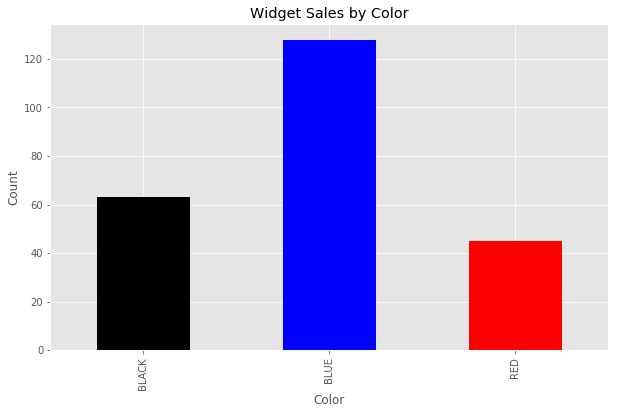

In [51]:
# plot distribution of color
fig = plt.figure(figsize=(10,6))
ax = df.groupby('color')['color'].count().plot(x='color', kind='bar', color=['k','b','r']);
ax.set(xlabel='Color',
      ylabel='Count',
      title='Widget Sales by Color');

print('Widgets Sold\n'
      '-------------\n'
     'Black: {} ({:.2f}%)\n'
     'Blue: {} ({:.2f}%)\n'
     'Red: {} ({:.2f}%)\n'
      'Total: {}'.format(df[df.color == 'BLACK'].shape[0],
                         (df[df.color == 'BLACK'].shape[0] / df.shape[0] * 100),
                         df[df.color == 'BLUE'].shape[0],
                         (df[df.color == 'BLUE'].shape[0] / df.shape[0] * 100),
                         df[df.color == 'RED'].shape[0],
                         (df[df.color == 'RED'].shape[0] / df.shape[0] * 100),
                         df.shape[0]))

236 widgets were sold at the auction in total. We had the fewest sales, with Red widgets comprising less than 20% of the total sales. Black widgets amounted to a little more than a quarter of sales and Blue widgets were the largest portion of sales, comprising more than 50% of the total sales. Without more information it is hard to say whether Blue widgets were more desirable or there were more Blue widgets available. Either way, there is room for us to improve our share of the widget market.

### Edges Analysis

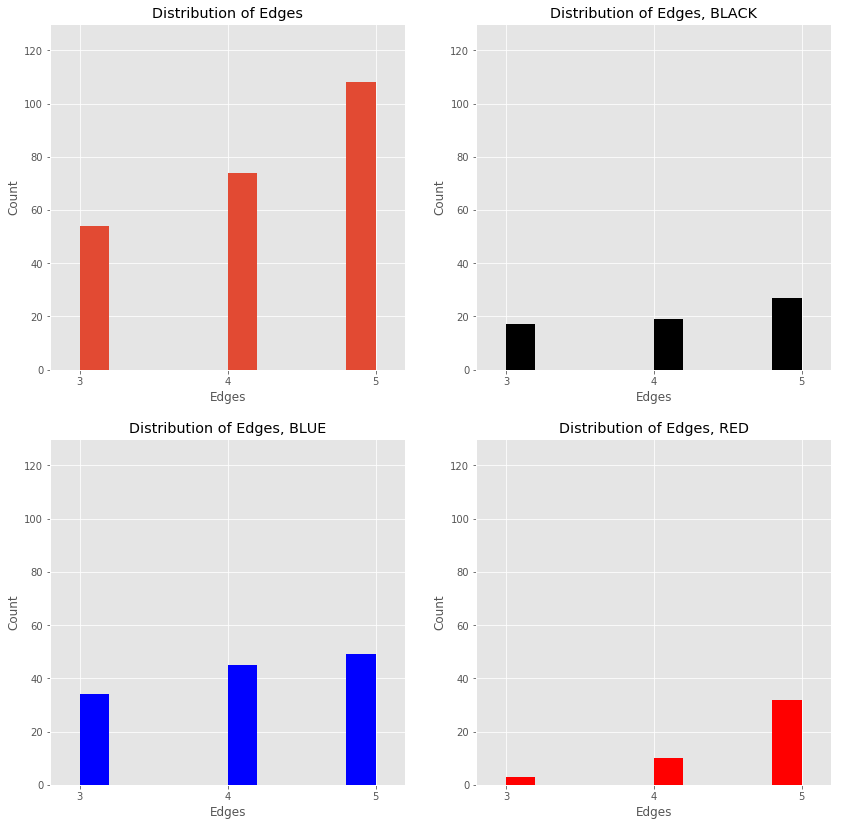

In [46]:
plt.subplots(2,2, figsize=(14,14));

plt.subplot(221)
ax = df.edges.hist()
ax.set(xlabel='Edges',
      ylabel='Count',
      title='Distribution of Edges',
      xticks=[2,3,4,5,6],
      xlim=(2.8, 5.2),
      ylim=(0,130));

plt.subplot(222)
ax = df[df.color == 'BLACK']['edges'].hist(color='k');
ax.set(xlabel='Edges',
      ylabel='Count',
      title='Distribution of Edges, BLACK',
      xticks=[2,3,4,5,6],
      xlim=(2.8, 5.2),
      ylim=(0,130));

plt.subplot(223)
ax = df[df.color == 'BLUE']['edges'].hist(color='b');
ax.set(xlabel='Edges',
      ylabel='Count',
      title='Distribution of Edges, BLUE',
      xticks=[2,3,4,5,6],
      xlim=(2.8, 5.2),
      ylim=(0,130));

plt.subplot(224)
ax = df[df.color == 'RED']['edges'].hist(color='r');
ax.set(xlabel='Edges',
      ylabel='Count',
      title='Distribution of Edges, RED',
      xticks=[2,3,4,5,6],
      xlim=(2.8, 5.2),
      ylim=(0,130));

Overall, the number of widgets sold was proportional to the number of edges. So, the more edges the more widgets sold. However, while the Blue, Black, and overall sale of widgets exhibited a relatively steady increase in sales from three to four to five sides. We sold considerably more five-sided widgets than three- or four-sided widgets. This means that, relatively speaking, we had a higher average cost than our competitors by almost $10,000 per widget.

In [50]:
print('Average Cost per Widget\n'
      '-------------------------\n'
     'Black: {:.2f}\n'
     'Blue: {:.2f}\n'
     'Red: {:.2f}\n'
      'Total: {:.2f}'.format(df[df.color == 'BLACK'].cost.mean(),
                         df[df.color == 'BLUE'].cost.mean(),
                         df[df.color == 'RED'].cost.mean(),
                         df.cost.mean()))

Average Cost per Widget
-------------------------
Black: 83174.60
Blue: 82343.75
Red: 92888.89
Total: 84576.27


### Sale Price Analysis

In [47]:
df.groupby('color')['sale_price'].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
BLACK,63.0,113285.714286,73196.031219,17000.0,65000.0,95000.0,147500.0,410000.0
BLUE,128.0,146148.437500,181388.480732,15000.0,59250.0,100000.0,160000.0,1800000.0
RED,45.0,176333.333333,92185.583570,40000.0,120000.0,150000.0,210000.0,480000.0


Before analyzing the sale prices of the widgets. I first want to address the Blue widget that sold for \$1.8 million, which is appears to be an outlier and might be erroneous. It is possible that it might have sold for \$180,000 instead.

In [58]:
# identify the outlier
df[df.sale_price == 1800000]

,color,edges,sale_price,cost,profit
142,BLUE,4,1800000,80000.0,1720000.0


The outlier had four edges. Now I'd like to look at the characteristics of other four-edged widgets.

In [64]:
print('Four-edged Widgets\n'
      '-------------------\n'
      'Max sale price: {:.2f}\n'
      'Average sale price: {:.2f}\n'
      'Median sale price: {:.2f}\n'
      '\n'
      'BLUE Four-edged Widgets\n'
      '-------------------\n'
      'Max sale price: {:.2f}\n'
      'Average sale price: {:.2f}\n'
      'Median sale price: {:.2f}\n'.format(df[(df.edges == 4) & (df.sale_price < 1800000)].sale_price.max(),
                                          df[(df.edges == 4) & (df.sale_price < 1800000)].sale_price.mean(),
                                          df[(df.edges == 4) & (df.sale_price < 1800000)].sale_price.median(),
                                          df[(df.edges == 4) & (df.sale_price < 1800000) & (df.color == 'BLUE')].sale_price.max(),
                                           df[(df.edges == 4) & (df.sale_price < 1800000) & (df.color == 'BLUE')].sale_price.mean(),
                                           df[(df.edges == 4) & (df.sale_price < 1800000) & (df.color == 'BLUE')].sale_price.median()))

Four-edged Widgets
-------------------
Max sale price: 315000.00
Average sale price: 99835.62
Median sale price: 95000.00

BLUE Four-edged Widgets
-------------------
Max sale price: 315000.00
Average sale price: 96045.45
Median sale price: 95000.00



The next-closest sale price for any four-edged widget was \$315,000 and the mean and median sale prices for four-edged widgets fall between \$95,000 and \$100,000, included Blue, four-edged widgets. It seems safe to assume the widget that sold for \$1.8 million is an erroneous entry. Without knowing more about the widget domain I'm going to set the sale price of this widget to the average sale price of Blue, four-edged widgets rather than assume it was an order-of-magnitude error.

In [84]:
# set erroneous sale price to average sale price of blue, four-edged widgets
df.iloc[141, 2] = df[(df.edges == 4) & (df.sale_price < 1800000) & (df.color == 'BLUE')].sale_price.mean()
df.iloc[141, :]

color            BLUE
edges               4
sale_price    96045.5
cost            80000
profit        16045.5
Name: 142, dtype: object

In [85]:
# re-display sale_price summary statistics
df.groupby('color')['sale_price'].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
BLACK,63.0,113285.714286,73196.031219,17000.0,65000.0,95000.0,147500.0,410000.0
BLUE,128.0,132836.292614,105857.139208,15000.0,59250.0,100000.0,152500.0,600000.0
RED,45.0,176333.333333,92185.583570,40000.0,120000.0,150000.0,210000.0,480000.0


Our sales of Red widgets were higher on-average than out competitors'. We sold our widgets for an average of \$176,333.33 per widget, with the lowest sale being for \$40,000 and the highest for \$480,000. However, the highest sale price was for a Blue widget at \$600,000.

### Profit Analysis

In [87]:
df.groupby('color')['profit'].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
BLACK,63.0,30111.111111,64594.794335,-70000.0,-5000.0,15000.0,47500.0,310000.0
BLUE,128.0,50492.542614,98085.887905,-68000.0,-10000.0,20000.0,66250.0,500000.0
RED,45.0,83444.444444,89161.639620,-60000.0,30000.0,50000.0,110000.0,380000.0


In [109]:
print('Total Profit\n'
      '-------------\n'
     'Black: {:.2f}\n'
     'Blue: {:.2f}\n'
     'Red: {:.2f}\n'.format(df[df.color == 'BLACK'].profit.sum(),
                         df[df.color == 'BLUE'].profit.sum(),
                         df[df.color == 'RED'].profit.sum()))

Total Profit
-------------
Black: 1897000.00
Blue: 6463045.45
Red: 3755000.00



Compared to our competitor that produces Black widgets, we performed very well in terms of profits. We sold our widgets for roughly twice their profit. However, we were beat significantly by the producer of Blue widgets, which almost doubled our profits. The data shows that we profited well of our widgets. We had the highest average profit of almost \$90,000 per widget and more than 90% of our sales were profitable (we lost money on fewer than 9% of sales). However, the manufacturer of Blue widgets had the greatest single profit of \$500,000 for a widget. Despite our performance, the manufacturer of Blue widgets nearly doubled our profits simply because it sold almost three times as many widgets than we did.

### Conclusion

We resoundly outperformed our competitor that manufactures Black widgets and our widgets sold very well overall. However, the manufacturer of Blue widgets commanded a majority of widget sales at the auction and was able to make almost twice as much profit as we did as a result of the greater volume of sales. It seems that our focus on the production of five-edged widgets payed off but we need to make an effort to accumulate a greater market share at auction. More work will need to be done to determine whether this should be accomplished via greater production of five-edged widgets or by diversifying our widget offerings to produce more three- and four-edged widgets.